<a href="https://colab.research.google.com/github/ollihansen90/linclassifiers/blob/main/jupyternotebooks/Bestgerade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

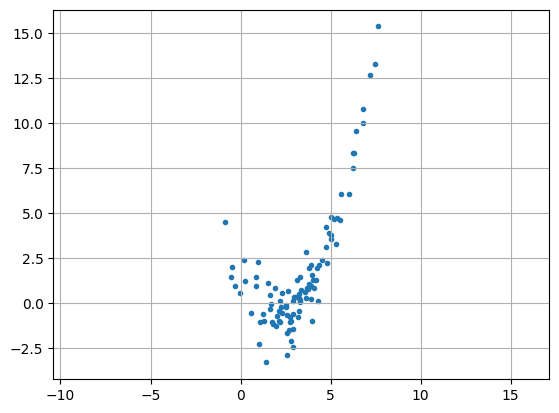

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class lineareFunktion():
    def __init__(self, m=1, b=-1):
        self.m = m
        self.b = b

    def __call__(self, x):
        return self.m*x+self.b

    def __str__(self):
        if self.m==0:
            return str(self.b)
        op = "+" if self.b>=0 else "-"
        b = self.b
        if b==0:
            return f"{self.m}*x"
        return f"{self.m}*x{op}{np.abs(b)}"

    def copy(self):
        return lineareFunktion(self.m, self.b)

class QuadraticFunction():
    def __init__(self, a=1, b=1, c=1):
        self.a = a
        self.b = b
        self.c = c

    def __call__(self, x):
        return self.a*x**2+self.b*x+self.c

    def __str__(self):
        op1 = "+" if self.b>=0 else "-"
        op2 = "+" if self.c>=0 else "-"
        return f"{self.a}*x^2{op1}{np.abs(self.b)}*x{op2}{np.abs(self.c)}"

    def copy(self):
        return QuadraticFunction(self.a, self.b, self.c)

#data = np.random.randn(100)@np.array([[1,0.5],[0.5,1]])+np.array([1,4])
q = QuadraticFunction(a=0.5, b=-2, c=1)
base = 2*np.random.randn(100)+3
data = np.column_stack((base, q(base)+np.random.randn(100)))

plt.figure()
plt.scatter(data[:,0], data[:,1], marker=".")
plt.grid()
plt.axis("equal")
plt.show()

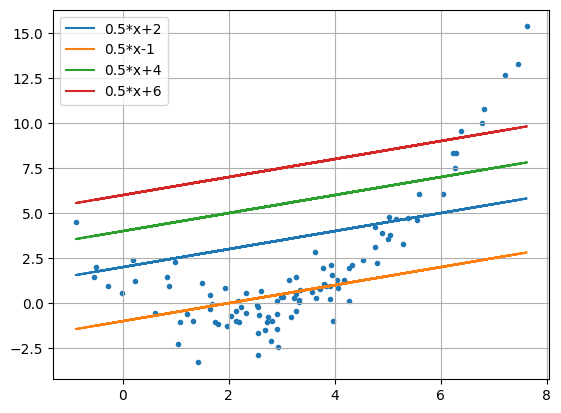

In [8]:
y = [lineareFunktion(1/2, i) for i in [2,-1,4,6]]
plt.figure()
plt.scatter(data[:,0], data[:,1], marker=".", label="_nolegend_")
for i in range(len(y)):
    plt.plot(data[:,0], y[i](data[:,0]))
plt.grid()
plt.legend([str(f) for f in y])
#plt.axis("equal")
plt.show()

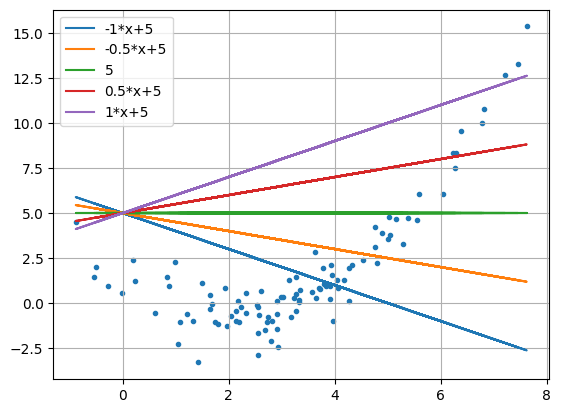

In [9]:
y = [lineareFunktion(i, 5) for i in [-1,-1/2,0,1/2,1]]
plt.figure()
plt.scatter(data[:,0], data[:,1], marker=".", label="_nolegend_")
for i in range(len(y)):
    plt.plot(data[:,0], y[i](data[:,0]))
plt.grid()
plt.legend([str(f) for f in y])
#plt.axis("equal")
plt.show()

In [4]:
def fehlerfunktion(f, data):
    prediction = f(data[:,0])
    label = data[:, 1]
    #return np.mean(np.sqrt(np.abs(prediction-label)))
    return np.mean((prediction-label)**2)
"""
(f(x)-y)**2
(a*x+b-y)**2

g(h(x))' = g'(h(x))*h'(x)
2*(a*x+b-y)*x
2*(a*x+b-y)*1

"""
def del_fehlerfunktion(f, data):
    x = data[:, 0]
    y = data[:, 1]
    m = f.m
    b = f.b
    d_m = 2*(f(x)-y)*x
    d_b = 2*(f(x)-y)
    return np.mean(d_m), np.mean(d_b)

funktion = lineareFunktion(-1, 5)
print(fehlerfunktion(funktion, data))
funktion = lineareFunktion(1, 5)
print(fehlerfunktion(funktion, data))

24.449045982136667
49.34791640598447


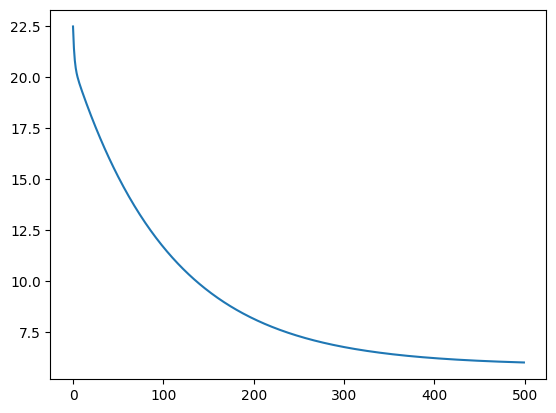

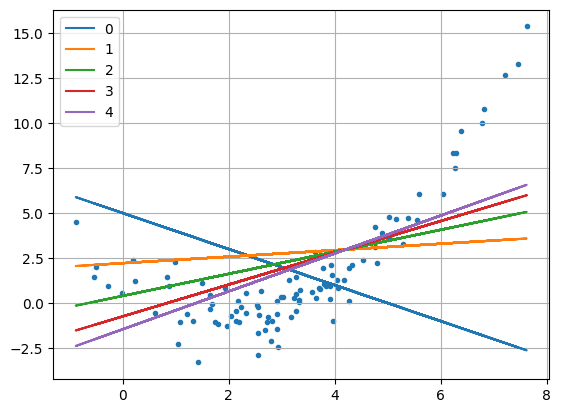

In [10]:
N = 500
lr = 0.01

fehler = np.zeros(N)
funktion = lineareFunktion(-1, 5)
funkliste = []
for i in range(N):
    if i%100==0:
        #print(i)
        funkliste.append(funktion.copy())
    d_m, d_b = del_fehlerfunktion(funktion, data)
    #print(d_m, d_b)
    funktion.m -= lr*d_m
    funktion.b -= lr*d_b
    fehler[i] = fehlerfunktion(funktion, data)

#print([str(ff) for ff in funkliste])

plt.figure()
plt.plot(fehler)
plt.show()

plt.figure()
plt.scatter(data[:,0], data[:,1], marker=".", label="_nolegend_")
for ff in funkliste:
    plt.plot(data[:,0], ff(data[:,0]))
plt.grid()
plt.legend([str(i) for i in range(len(funkliste))])
#plt.axis("equal")
plt.show()
